In [1]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("balanced_preprocessed_data.csv")

In [3]:
df.head(1)

operational_stress  temperature_differential  thermal_stress  Tool wear  \
0            0.436558                  0.764706        1.577556    1.30744   

   Process temperature  Rotational speed  Machine failure  
0            -1.486592         -0.680851              0.0

dropping non-viable features

In [4]:
df.drop(['temperature_stability', 'Air temperature','wear_rate'], axis=1, inplace=True, errors='ignore')

In [5]:
df.head(1)

operational_stress  temperature_differential  thermal_stress  Tool wear  \
0            0.436558                  0.764706        1.577556    1.30744   

   Process temperature  Rotational speed  Machine failure  
0            -1.486592         -0.680851              0.0

In [6]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

### Visualisations

Box Whisker Plots for all attributes compared to Machine Failure

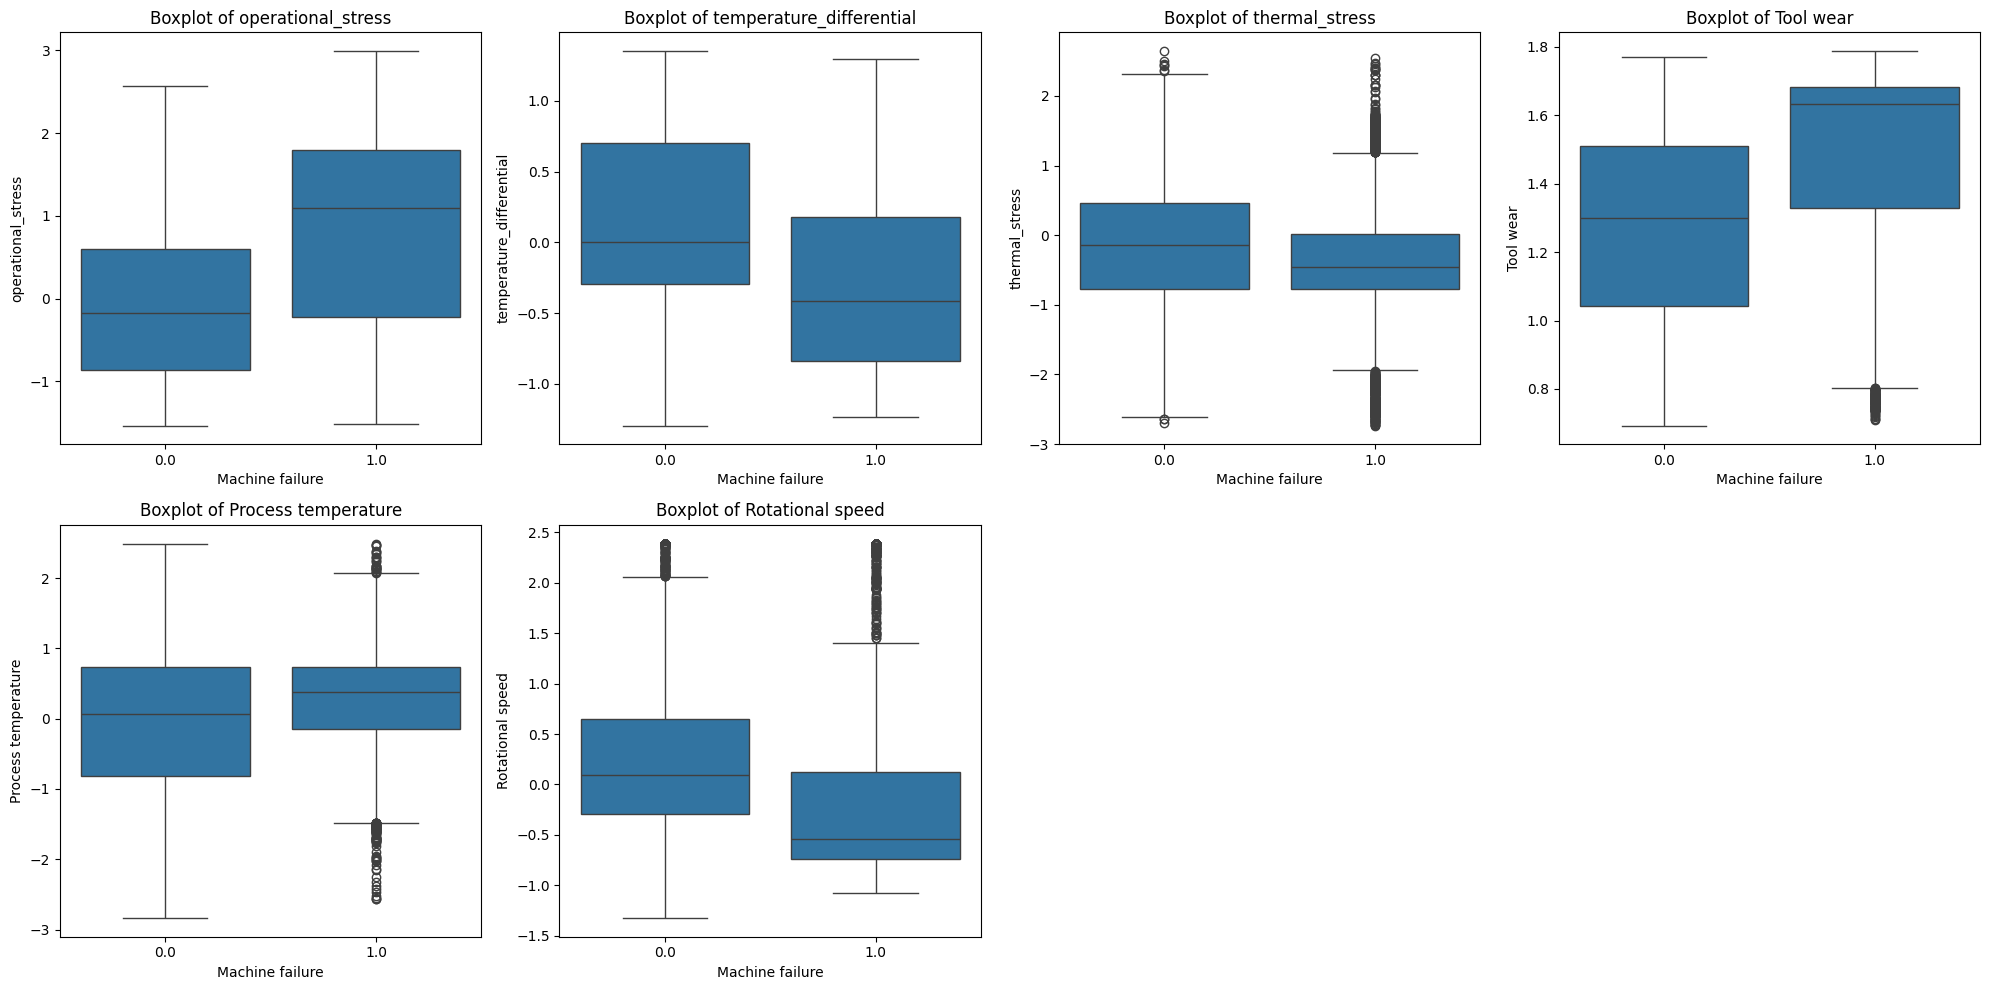

In [7]:
# Ensure Machine failure is treated as a categorical variable and select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Machine failure')

# Determine layout
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i // n_cols][i % n_cols])
    ax[i // n_cols][i % n_cols].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax[j // n_cols][j % n_cols])

plt.tight_layout()
plt.show()


In [8]:
# plot_columns = [col for col in df.columns if col not in excluded_columns]
# df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

<Axes: >

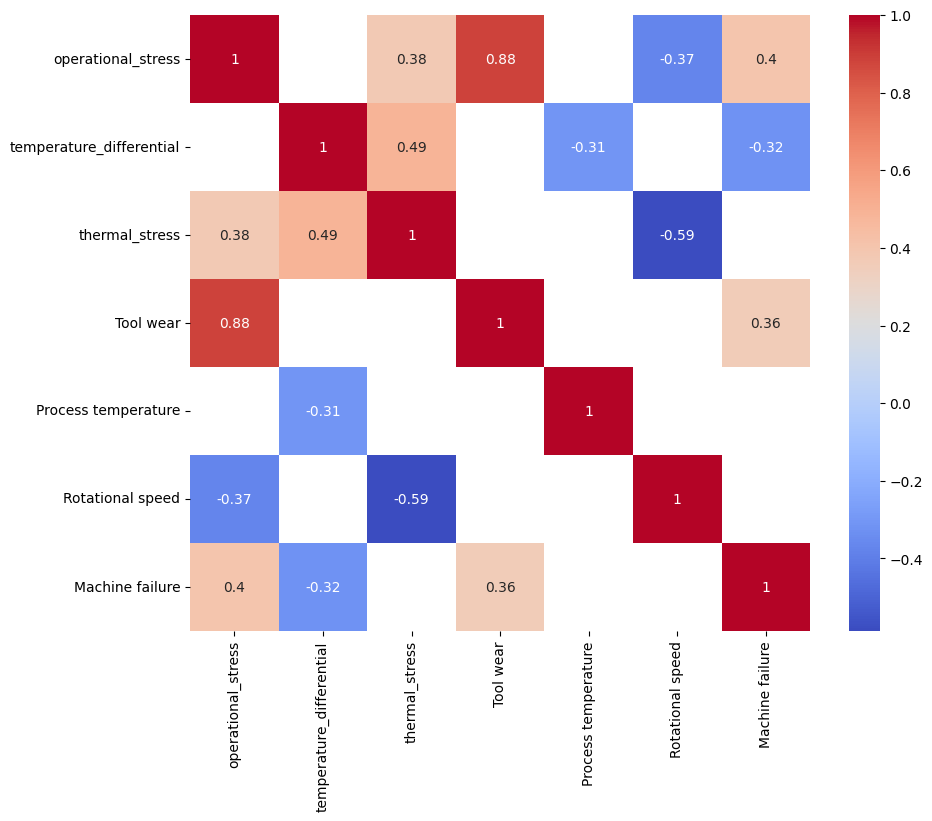

In [9]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

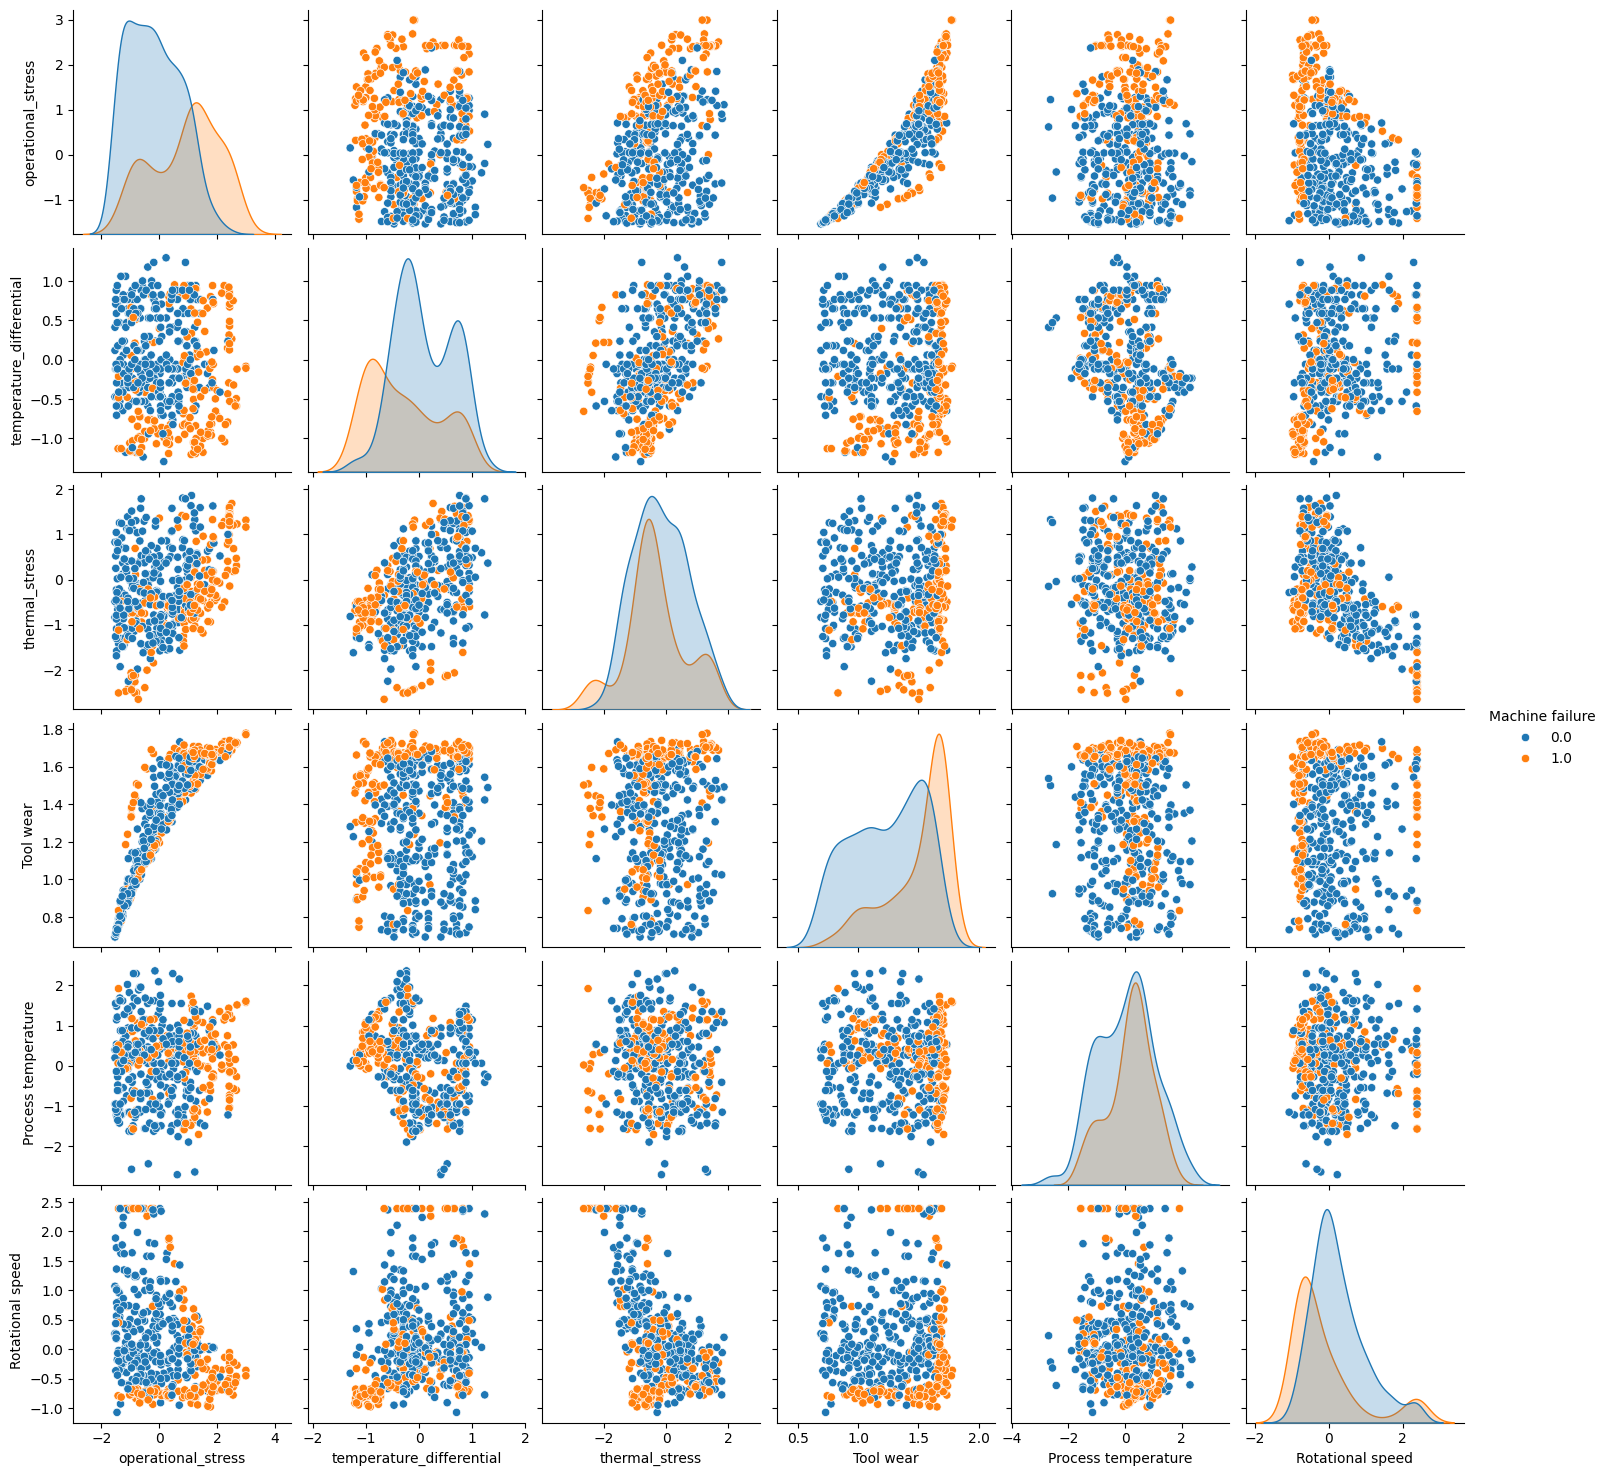

In [10]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

<Axes: >

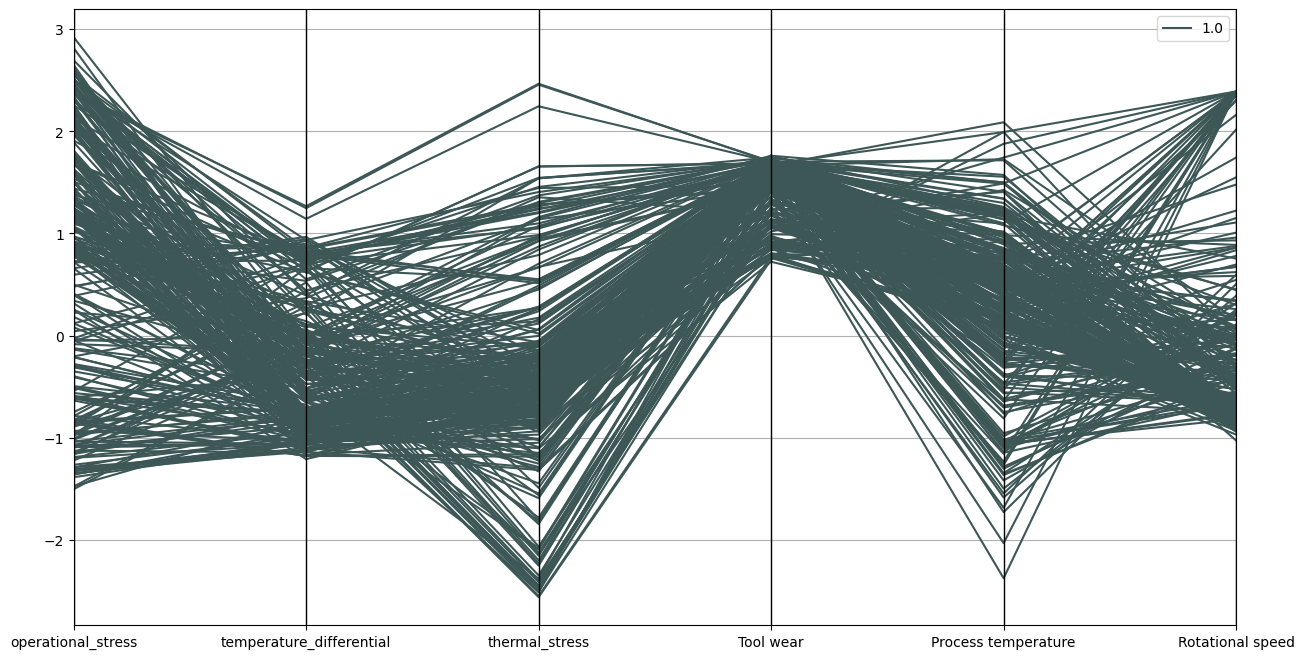

In [11]:
sample = df.sort_values(by=['Machine failure'], ascending=False).head(300)

plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(sample, 'Machine failure', color=('#3D5656', '#68B984', '#FED049'))

In [12]:
df_profile = pdpf.ProfileReport(df)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]